In [ ]:
# import modules
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# load dataset
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Separting features and target
feat = list(df.columns)[:-1]
target = 'quality'

In [ ]:
# split X and y
X = df[feat]
y = df[target]

In [ ]:
# Upsampling the values
over = SMOTE()
ox, oy = over.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
# Creating new resampled dataframe.
new_x = pd.DataFrame(ox)
new_y = pd.Series(oy)

new_df = pd.concat([new_x, new_y], axis=1)
new_df.columns = df.columns
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Split data into train test
X = new_df[feat]
y = new_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standarding values.
sa = StandardScaler()
new_X_train = sa.fit_transform(X_train)
new_X_test = sa.fit_transform(X_test)

In [ ]:
# Create Logistic Regression model.
 
model = LogisticRegression(max_iter=10000, random_state=42, multi_class="ovr", n_jobs=-1)
model.fit(new_X_train, y_train)
print("Training metrics =>", model.score(new_X_train, y_train))
print("Testing metrics =>", model.score(new_X_test, y_test))
y_pred = model.predict(new_X_test)
print("\n\n")

Training metrics => 0.597001223990208
Testing metrics => 0.5941320293398533





degree => 3
Number of feature => 363


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.8s finished


Training metrics => 0.8858629130966952
Testing metrics => 0.8251833740831296





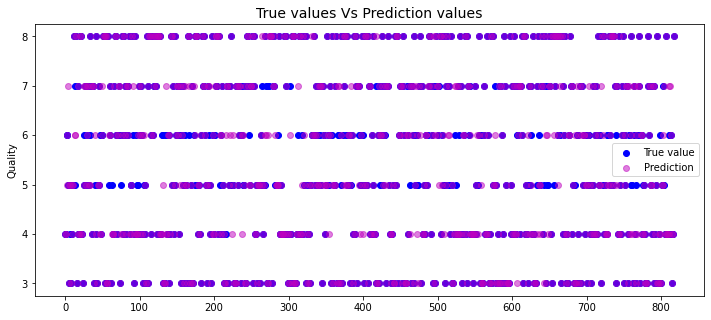

In [ ]:
# Polynomial eq
 
degree = 3
print("degree =>", degree)
 
poly = PolynomialFeatures(degree=degree,include_bias=False)
new_X_train = poly.fit_transform(new_X_train)
new_X_test = poly.fit_transform(new_X_test)
 
print("Number of feature =>", new_X_test.shape[1])
 
pmodel = LogisticRegression(max_iter=100, random_state=42, multi_class="ovr", n_jobs=-1, verbose=1)
pmodel.fit(new_X_train, y_train)
print("Training metrics =>", pmodel.score(new_X_train, y_train))
print("Testing metrics =>", pmodel.score(new_X_test, y_test))
y_pred = pmodel.predict(new_X_test)
print("\n\n")
 
x_axis_values = [i for i in range(y_test.shape[0])]
 
plt.figure(figsize=(12, 5))
plt.title("True values Vs Prediction values", fontsize=14)
plt.scatter(x=x_axis_values, y=y_test, label="True value", color='b', alpha=1)
plt.scatter(x=x_axis_values, y=y_pred, label="Prediction", color='m', alpha=0.5)
plt.ylabel("Quality")
plt.legend()
plt.show()